# Dados e Aprendizagem Automática
### Part II

## **Decision Tree Classifier**

In [505]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score

In [506]:
'''
Load CSV
'''
df = pd.read_csv('datasets/titanic_dataset.csv')

In [507]:
'''
Inspect dataset
'''
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [508]:
#Let's start by creating our X (input data) and our y (target feature - the Survived feature)
X = df.drop(['Survived'], axis= 1)      #input features - everything except the Survived feature
y = df['Survived'].to_frame()         #target feature

In [509]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [510]:
#Let's use the X and Y, which contain 891 rows of data
#to create train and test sets of data.
#Important -> Define the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
print(f"X_train shape of x %s. X_train has shape %s while X_test has shape %s: {X.shape, X_train.shape, X_test.shape}")

X_train shape of x %s. X_train has shape %s while X_test has shape %s: ((891, 11), (668, 11), (223, 11))


In [511]:
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of y (891, 1). y_train has shape (668, 1) while y_test has shape (223, 1)


In [512]:
#Create an instance of a Decision Tree classifier
#Again, defining the random_state for reproducibility
#clf = DecisionTreeClassifier(random_state=2021)

In [513]:
#Training, i.e., fitting the model (using the training data!!)
#clf.fit(X_train, y_train)

In [514]:
#dropping categorical features from the input data (X_train and X_test)
X_train = X_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)
X_test = X_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [515]:
#Training, i.e., fitting the model (using the training data!!)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [516]:
#obtaining predictions
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0])

In [517]:

print(y_test.values.shape)

(223, 1)


#### Quality Metrics and Model Evaluation

In [518]:
confusion_matrix(y_test, predictions)

array([[96, 39],
       [43, 45]])

In [519]:
accuracy_score(y_test, predictions)

0.6322869955156951

In [520]:
precision_score(y_test, predictions)

0.5357142857142857

In [521]:
recall_score(y_test, predictions)

0.5113636363636364

In [522]:
roc_auc_score(y_test, predictions)

np.float64(0.6112373737373737)

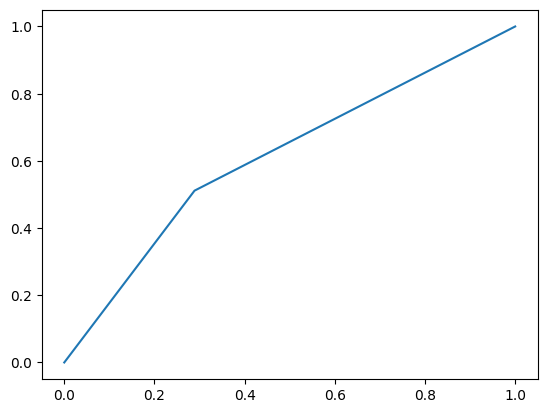

In [523]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.show()

In [524]:
f1_score(y_test, predictions)

0.5232558139534884

In [525]:
fbeta_score(y_test, predictions, beta=0.5)

0.5306603773584906

## **Decision Tree Regressor**

In [526]:
#Let's assume a REGRESSION problem! Let's predict the FARE paid by a person 
#(maybe not a very good problem but it serves its purpose)!
#Let's start by creating our X (input data) and our y (target feature - the Fare feature)
X =  df.drop(['Fare'], axis = 1)  #input features - everything except the Fare feature
y =   df['Fare'].to_frame()      #target feature

In [527]:
#Let's use the X and Y, which contain 891 rows of data
#to create train and test sets of data.
#Important -> Define the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

#dropping categorical features from the input data (X_train and X_test)
X_train = X_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)
X_test = X_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)


In [528]:
#Create an instance of a Decision Tree regressor
#Again, defining the random_state for reproducibility
clr = DecisionTreeRegressor(random_state=2021)
clr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2021)

In [529]:
#Training, i.e., fitting the model (using the training data!!)


In [530]:
#obtaining predictions


#### Quality Metrics and Model Evaluation

In [531]:
mean_absolute_error(y_test, predictions)

30.85339910313902

In [532]:
mean_squared_error(y_test, predictions)

3539.1424953067262

In [533]:
root_mean_squared_error(y_test, predictions)

59.490692509893734

### Model Validation

#### **Cross_val_score**

In [534]:
'''
Load CSV
'''
df = pd.read_csv('datasets/titanic_dataset.csv')

In [535]:
#Let's start by creating our X (input data) and our y (target feature - the Survived feature)
X =  df.drop(['Survived'], axis=1)    #input features - everything except the Survived feature
y =  df['Survived'].to_frame()       #target feature

In [536]:
print("USING A DECISION TREE WITH cross_val_score (MEAN ACCURACY)...")
X = X.drop(['Name','Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)
clf = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=2021)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

USING A DECISION TREE WITH cross_val_score (MEAN ACCURACY)...
[0.58888889 0.61797753 0.52808989 0.50561798 0.59550562 0.70786517
 0.70786517 0.70786517 0.59550562 0.74157303]
RESULT: 0.63 accuracy with a standard deviation of 0.08


#### **K-fold**

In [537]:
'''
Iterating manually (with K-fold, Repeated K-fold, Leave One Out, Shuffle Split, Stratified k-fold, TimeSeriesSplit, ...)
'''
print("USING A DECISION TREE WITH MANUAL ITERATION (KFold) and obtaining confusion matrix...")
from sklearn.model_selection import KFold

clf = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=2021)
scores = []
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    clf.fit(X.loc[train,:], y.loc[train,:])
    score = clf.score(X.loc[test,:], y.loc[test,:])
    scores.append(score)
    y_predicted = clf.predict(X.loc[test,:])
    print("Confusion Matrix:")
    print(confusion_matrix(y.loc[test,:], y_predicted))
    print(score)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (np.mean(scores), np.std(scores)))

USING A DECISION TREE WITH MANUAL ITERATION (KFold) and obtaining confusion matrix...
Confusion Matrix:
[[45  6]
 [27 12]]
0.6333333333333333
Confusion Matrix:
[[33 36]
 [ 8 12]]
0.5056179775280899
Confusion Matrix:
[[38 17]
 [19 15]]
0.5955056179775281
Confusion Matrix:
[[38  6]
 [24 21]]
0.6629213483146067
Confusion Matrix:
[[34 18]
 [17 20]]
0.6067415730337079
Confusion Matrix:
[[41 16]
 [ 9 23]]
0.7191011235955056
Confusion Matrix:
[[33 17]
 [13 26]]
0.6629213483146067
Confusion Matrix:
[[42 14]
 [15 18]]
0.6741573033707865
Confusion Matrix:
[[44 15]
 [10 20]]
0.7191011235955056
Confusion Matrix:
[[41 15]
 [14 19]]
0.6741573033707865
RESULT: 0.65 accuracy with a standard deviation of 0.06
